## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro



In [3]:
df = pd.read_csv('data/flights.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-09-30,DL,DL_CODESHARE,DL,5119,9E,N319PQ,5119,14576,ROC,...,264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-30,DL,DL_CODESHARE,DL,5123,9E,N909XJ,5123,12451,JAX,...,828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-30,DL,DL_CODESHARE,DL,5124,9E,N181PQ,5124,12953,LGA,...,1148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-30,DL,DL_CODESHARE,DL,5126,9E,N8918B,5126,12264,IAD,...,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-30,DL,DL_CODESHARE,DL,5127,9E,N8839E,5127,13931,ORF,...,290,0.0,0.0,0.0,0.0,53.0,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

### Checking Null values

In [6]:
df.isna().sum()

fl_date                       0
mkt_unique_carrier            0
branded_code_share            0
mkt_carrier                   0
mkt_carrier_fl_num            0
op_unique_carrier             0
tail_num                  49269
op_carrier_fl_num             0
origin_airport_id             0
origin                        0
origin_city_name              0
dest_airport_id               0
dest                          0
dest_city_name                0
crs_dep_time                  0
dep_time                 258814
dep_delay                263754
taxi_out                 273274
wheels_off               273264
wheels_on                281162
taxi_in                  281172
crs_arr_time                  0
arr_time                 275079
arr_delay                311744
cancelled                     0
cancellation_code      15658277
diverted                      0
dup                           0
crs_elapsed_time             20
actual_elapsed_time      309157
air_time                 315221
flights 

In [7]:
df.shape

(15927485, 42)

### Dropping Null values

In [8]:
df.dropna(subset=['dep_time', 'dep_delay','taxi_out','wheels_off','wheels_on','arr_time','arr_delay','actual_elapsed_time','air_time'], inplace=True)

In [9]:
df.shape

(15605077, 42)

In [10]:
df.isna().sum()

fl_date                       0
mkt_unique_carrier            0
branded_code_share            0
mkt_carrier                   0
mkt_carrier_fl_num            0
op_unique_carrier             0
tail_num                      0
op_carrier_fl_num             0
origin_airport_id             0
origin                        0
origin_city_name              0
dest_airport_id               0
dest                          0
dest_city_name                0
crs_dep_time                  0
dep_time                      0
dep_delay                     0
taxi_out                      0
wheels_off                    0
wheels_on                     0
taxi_in                       0
crs_arr_time                  0
arr_time                      0
arr_delay                     0
cancelled                     0
cancellation_code      15605077
diverted                      0
dup                           0
crs_elapsed_time              1
actual_elapsed_time           0
air_time                      0
flights 

In [11]:
df[['cancellation_code','no_name']].head()

,cancellation_code,no_name
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


## Drop 'no_name', 'cancellation_code' columns as they all contains Null values

In [12]:
df.drop(['no_name', 'cancellation_code'], axis=1, inplace=True)

In [13]:
df.isna().sum()

fl_date                       0
mkt_unique_carrier            0
branded_code_share            0
mkt_carrier                   0
mkt_carrier_fl_num            0
op_unique_carrier             0
tail_num                      0
op_carrier_fl_num             0
origin_airport_id             0
origin                        0
origin_city_name              0
dest_airport_id               0
dest                          0
dest_city_name                0
crs_dep_time                  0
dep_time                      0
dep_delay                     0
taxi_out                      0
wheels_off                    0
wheels_on                     0
taxi_in                       0
crs_arr_time                  0
arr_time                      0
arr_delay                     0
cancelled                     0
diverted                      0
dup                           0
crs_elapsed_time              1
actual_elapsed_time           0
air_time                      0
flights                       0
distance

### Checking remaining fields with Null values

In [14]:
df[['carrier_delay','weather_delay','first_dep_time','total_add_gtime','longest_add_gtime']].tail(10)

,carrier_delay,weather_delay,first_dep_time,total_add_gtime,longest_add_gtime
15927475,NaN,NaN,NaN,NaN,NaN
15927476,NaN,NaN,NaN,NaN,NaN
15927477,NaN,NaN,NaN,NaN,NaN
15927478,NaN,NaN,NaN,NaN,NaN
15927479,NaN,NaN,NaN,NaN,NaN
15927480,48.0,0.0,1033.0,1.0,1.0
15927481,34.0,0.0,NaN,NaN,NaN
15927482,NaN,NaN,NaN,NaN,NaN
15927483,NaN,NaN,NaN,NaN,NaN
15927484,NaN,NaN,NaN,NaN,NaN


### Replacing Null values with 0

In [15]:
df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime']] = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime']].fillna(0)


In [16]:
df.isna().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       1
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
first_dep_time         0
total_add_gtime        0
longest_add_gtime      0


### Droppinig the last Null value in crs_elapsed_time       

In [17]:
df.dropna(subset=['crs_elapsed_time'], inplace=True)

In [18]:
df.isna().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
first_dep_time         0
total_add_gtime        0
longest_add_gtime      0


In [19]:
df.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled                int64
diverted                 int64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                  int64
distance                 int64
carrier_

In [20]:
df['dup'].value_counts()

N    15605076
Name: dup, dtype: int64

In [21]:
df['diverted'].value_counts()

0    15605076
Name: diverted, dtype: int64

### Dropping dup' 'mkt_carrier' 'diverted' columns

In [22]:
df.drop(['dup', 'mkt_carrier','diverted'], axis=1, inplace=True)

In [23]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-09-30,DL,DL_CODESHARE,5119,9E,N319PQ,5119,14576,ROC,"Rochester, NY",...,1,264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-09-30,DL,DL_CODESHARE,5123,9E,N909XJ,5123,12451,JAX,"Jacksonville, FL",...,1,828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-09-30,DL,DL_CODESHARE,5124,9E,N181PQ,5124,12953,LGA,"New York, NY",...,1,1148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-09-30,DL,DL_CODESHARE,5126,9E,N8918B,5126,12264,IAD,"Washington, DC",...,1,228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-09-30,DL,DL_CODESHARE,5127,9E,N8839E,5127,13931,ORF,"Norfolk, VA",...,1,290,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [23]:
# Creating a new dataframe with only the columns about the delays

df_delay = df[['fl_date','dep_delay', 'arr_delay',]]


In [24]:
df_delay.head()

,fl_date,dep_delay,arr_delay
0,2018-09-30,-9.0,-29.0
1,2018-09-30,-5.0,-21.0
2,2018-09-30,-7.0,-11.0
3,2018-09-30,-6.0,-49.0
4,2018-09-30,55.0,53.0


<AxesSubplot:ylabel='Density'>

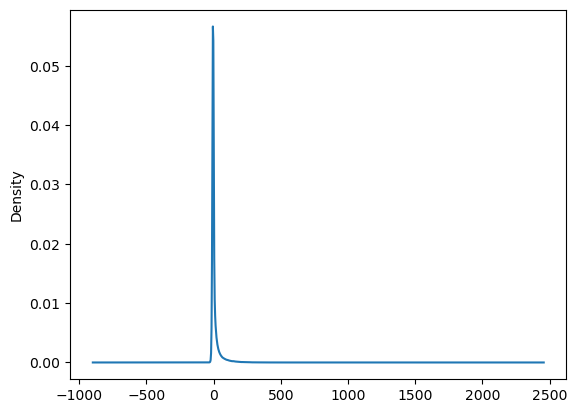

In [26]:
# Density Plot Departure Delay

df_delay['dep_delay'].plot(kind='density') 
plt.xlabel('Departure Delay')
plt.ylabel('Density')
plt.title('Density Distribution of Departure Delays')
plt.show()


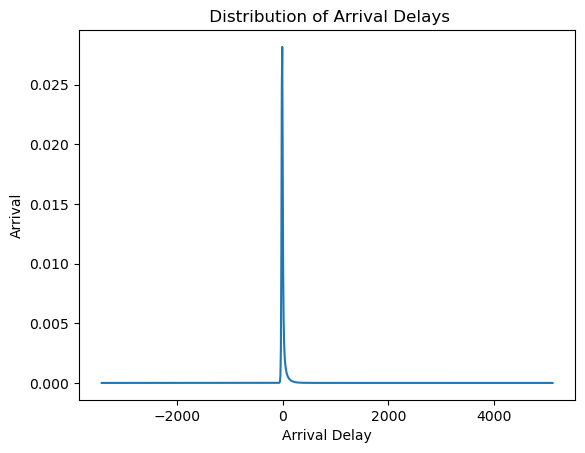

In [40]:
# Density Plot Arrival Delay

df_delay['arr_delay'].plot(kind='density') 
plt.xlabel('Arrival Delay')
plt.ylabel('Arrival')
plt.title(' Distribution of Arrival Delays')
plt.show()


## Shapiro Normality Test

In [59]:
stat, p = shapiro(df_delay['dep_delay'])
print('Shapiro-Wilk test statistics: %.3f, p-value: %.3f' % (stat, p))

Shapiro-Wilk test statistics: 0.395, p-value: 0.000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [27]:
stat, p = shapiro(df_delay['arr_delay'])
print('Shapiro-Wilk test statistics: %.3f, p-value: %.3f' % (stat, p))

Shapiro-Wilk test statistics: 0.496, p-value: 0.000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### As per the results Shapiro-Wilk test statistics: 0.375, p-value: 0.000 , p-value is less than 0.005 

<AxesSubplot:ylabel='Frequency'>

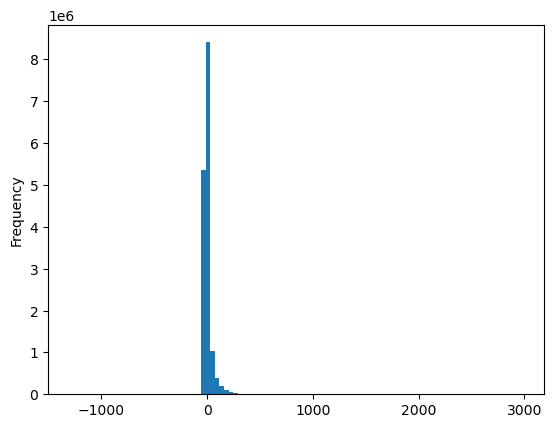

In [34]:
df_delay['arr_delay'].plot(kind='hist',bins=100)

<AxesSubplot:ylabel='Frequency'>

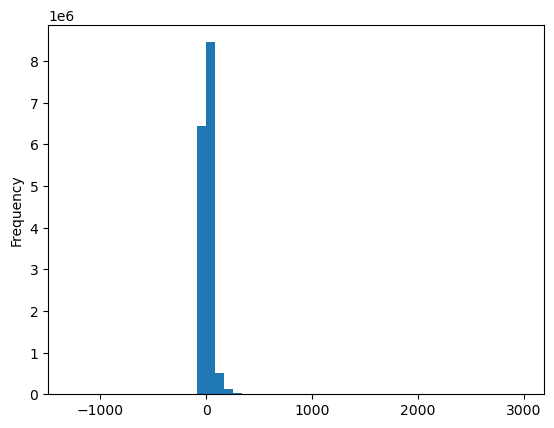

In [61]:
df_delay['dep_delay'].plot(kind='hist',bins=50)

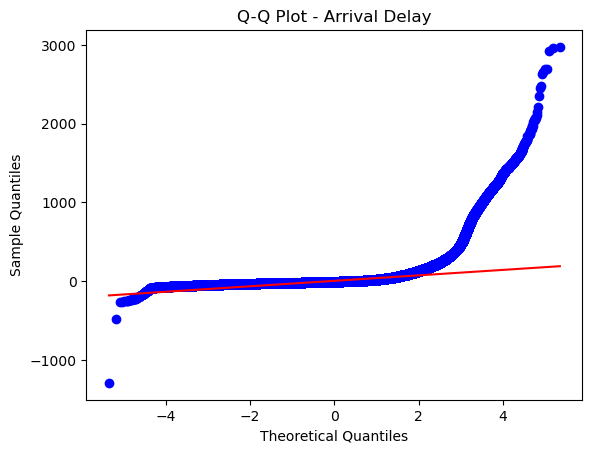

In [28]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate a Q-Q plot
stats.probplot(df_delay['arr_delay'], dist='norm', plot=plt)
plt.title('Q-Q Plot - Arrival Delay')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

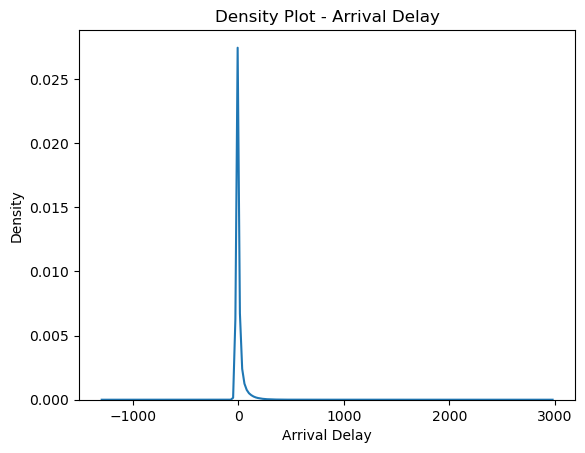

In [37]:

# Density Plot
sns.kdeplot(df_delay['arr_delay'])
plt.xlabel('Arrival Delay')
plt.ylabel('Density')
plt.title('Density Plot - Arrival Delay')
plt.show()



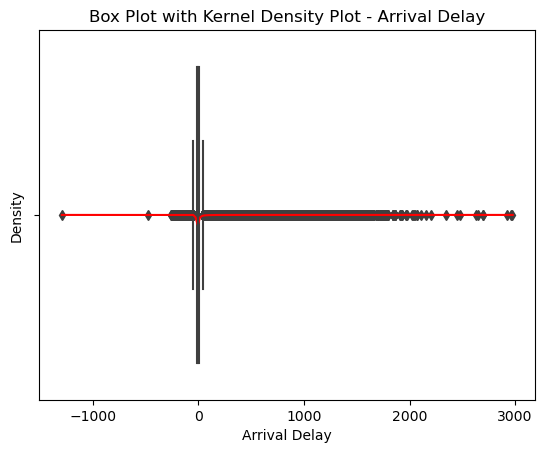

In [38]:
# Box Plot with Kernel Density Plot
sns.boxplot(data=df_delay, x='arr_delay')
sns.kdeplot(df_delay['arr_delay'], color='red')
plt.xlabel('Arrival Delay')
plt.title('Box Plot with Kernel Density Plot - Arrival Delay')
plt.show()

## T-Test - To test the hypothesis that the mean of the delay is 0

In [57]:
from scipy.stats import ttest_1samp

# Set the significance level
alpha = 0.05

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(df_delay['arr_delay'], 0)
print(t_statistic, p_value)
# Interpret the p-value
if p_value < alpha:
    print('The mean delay is significantly different from 0 at the {} level.'.format(alpha))
else:
    print('The mean delay is not significantly different from 0 at the {} level.'.format(alpha))

433.76063580403974 0.0
The mean delay is significantly different from 0 at the 0.05 level.


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [48]:
df_delay['month'] = pd.DatetimeIndex(df_delay['fl_date']).month
df_delay['year'] = pd.DatetimeIndex(df_delay['fl_date']).year

C:\Users\nasir\AppData\Local\Temp\ipykernel_8876\217336326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay['month'] = pd.DatetimeIndex(df_delay['fl_date']).month
C:\Users\nasir\AppData\Local\Temp\ipykernel_8876\217336326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay['year'] = pd.DatetimeIndex(df_delay['fl_date']).year


In [43]:
df_delay.head()

,fl_date,dep_delay,arr_delay
0,2018-09-30,-9.0,-29.0
1,2018-09-30,-5.0,-21.0
2,2018-09-30,-7.0,-11.0
3,2018-09-30,-6.0,-49.0
4,2018-09-30,55.0,53.0


In [92]:
avg_delay_dep = df_delay.groupby(['year', 'month'])['dep_delay'].mean()


In [93]:
avg_delay_dep_df = avg_delay_dep.reset_index()


In [94]:
avg_delay_df.head()

,year,month,dep_delay
0,2018,1,9.646726
1,2018,2,9.688404
2,2018,3,7.621878
3,2018,4,8.300802
4,2018,5,10.632575


Text(0.5, 1.0, 'Average Monthly Departure Delay by Year')

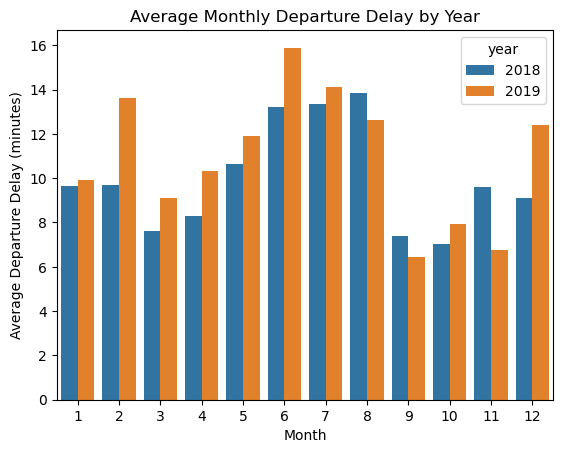

In [96]:
sns.barplot(data=avg_delay_dep_df, x='month', y='dep_delay', hue='year')


# Set the x and y axis labels and title
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Monthly Departure Delay by Year')

In [87]:
avg_delay_arr_df = df_delay.groupby(['year', 'month'])['arr_delay'].mean().reset_index()


In [89]:
avg_delay_arr_df.head()

,year,month,arr_delay
0,2018,1,3.191108
1,2018,2,4.132736
2,2018,3,2.121943
3,2018,4,3.599177
4,2018,5,5.984605


Text(0.5, 1.0, 'Average Monthly Arrival Delay by Year')

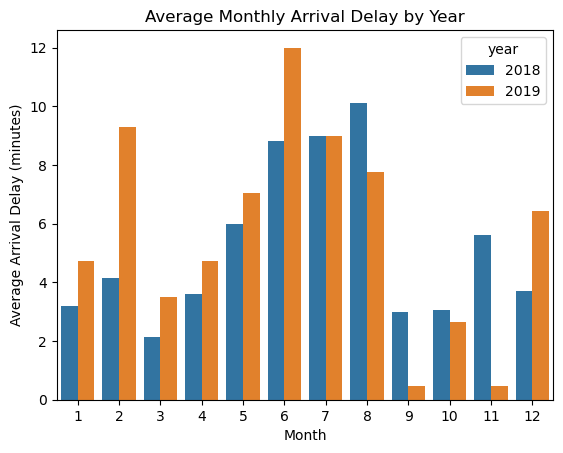

In [97]:
sns.barplot(data=avg_delay_arr_df, x='month', y='arr_delay', hue='year')


# Set the x and y axis labels and title
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Monthly Arrival Delay by Year')

Text(0.5, 1.0, 'Average Monthly Departure Delay by Year')

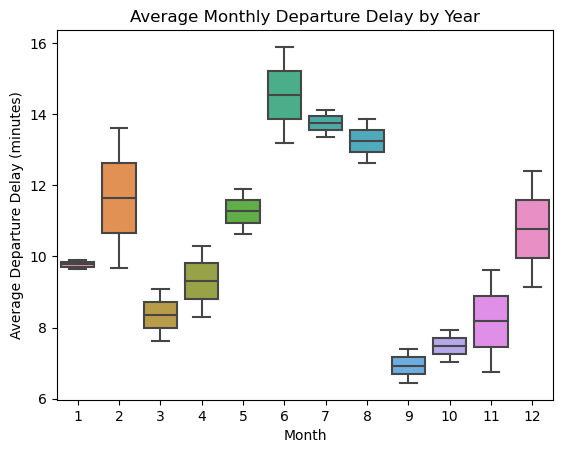

In [68]:
sns.boxplot(x='month', y='dep_delay', data=avg_delay_df)
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Monthly Departure Delay by Year')

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

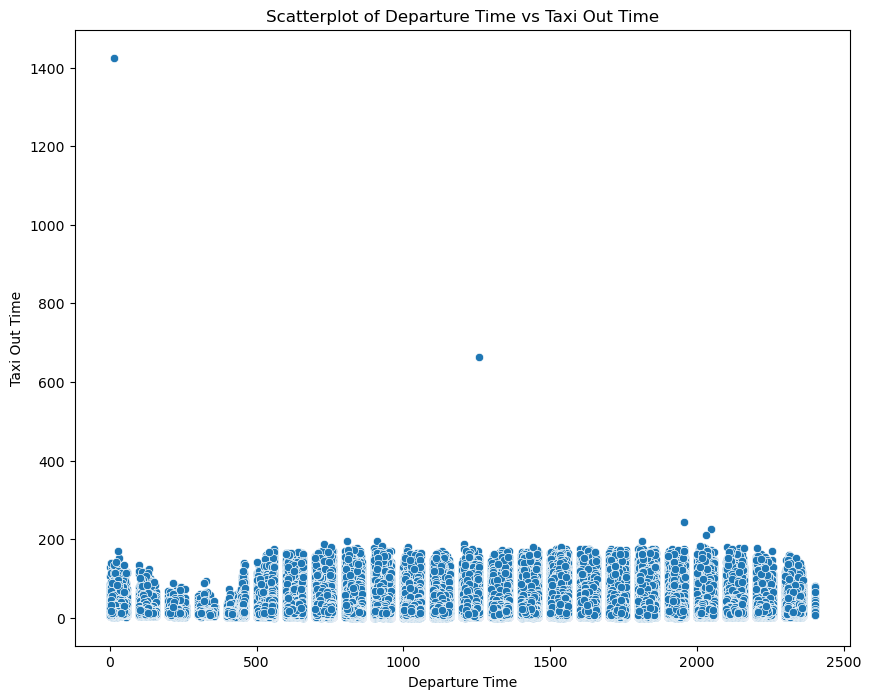

In [23]:
# Scatter plot departure time vs Taxi out time

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='dep_time', y='taxi_out')
plt.title('Scatterplot of Departure Time vs Taxi Out Time')
plt.xlabel('Departure Time')
plt.ylabel('Taxi Out Time')
plt.show()

In [99]:
# Convert dep_time to time format

df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H%M',errors='coerce')

# Create dataframe by extracting hour and taxi out time mean

hourly_taxi_out = df.groupby(df['dep_time'].dt.hour)['taxi_out'].mean()



In [73]:
hourly_taxi_out

dep_time
1.0     16.289662
2.0     15.470855
3.0     14.566854
4.0     14.634474
5.0     16.007925
6.0     16.772187
7.0     17.771238
8.0     19.371728
9.0     18.484505
10.0    17.737062
11.0    17.211286
12.0    16.852964
13.0    16.628058
14.0    16.837828
15.0    17.590526
16.0    17.311623
17.0    17.839241
18.0    18.399938
19.0    17.581494
20.0    18.145037
21.0    17.592636
22.0    17.096863
23.0    16.581349
Name: taxi_out, dtype: float64

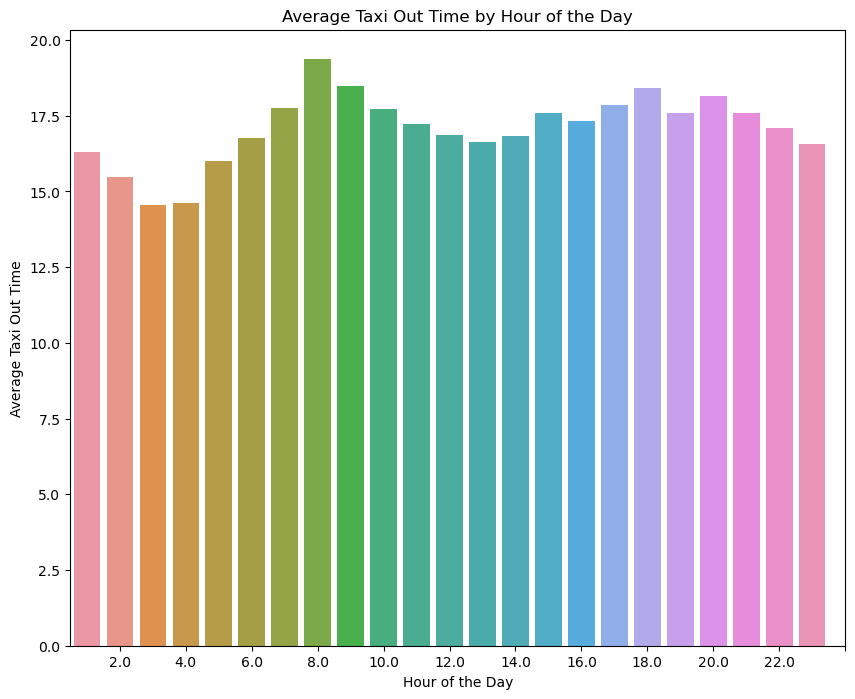

In [100]:
plt.figure(figsize=(10, 8))
sns.barplot(x=hourly_taxi_out.index, y=hourly_taxi_out.values)
plt.title('Average Taxi Out Time by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Taxi Out Time')

# set xticks interval to 2 hours
plt.xticks(hourly_taxi_out.index[::2])
plt.show()

### We observed that the between  7 -9 am has the highest taxi time

### Calculating total number of flights per hour 

In [101]:
hourly_flights = df.groupby(df['dep_time'].dt.hour)['flights'].sum()


In [71]:
hourly_flights

dep_time
1.0       1452
2.0       1818
3.0       2117
4.0       7443
5.0      87876
6.0     138563
7.0     133070
8.0     136370
9.0     127311
10.0    130783
11.0    134854
12.0    135701
13.0    122681
14.0    126057
15.0    130737
16.0    122839
17.0    135937
18.0    123797
19.0    115949
20.0    106968
21.0     75524
22.0     61875
23.0     23063
Name: flights, dtype: int64

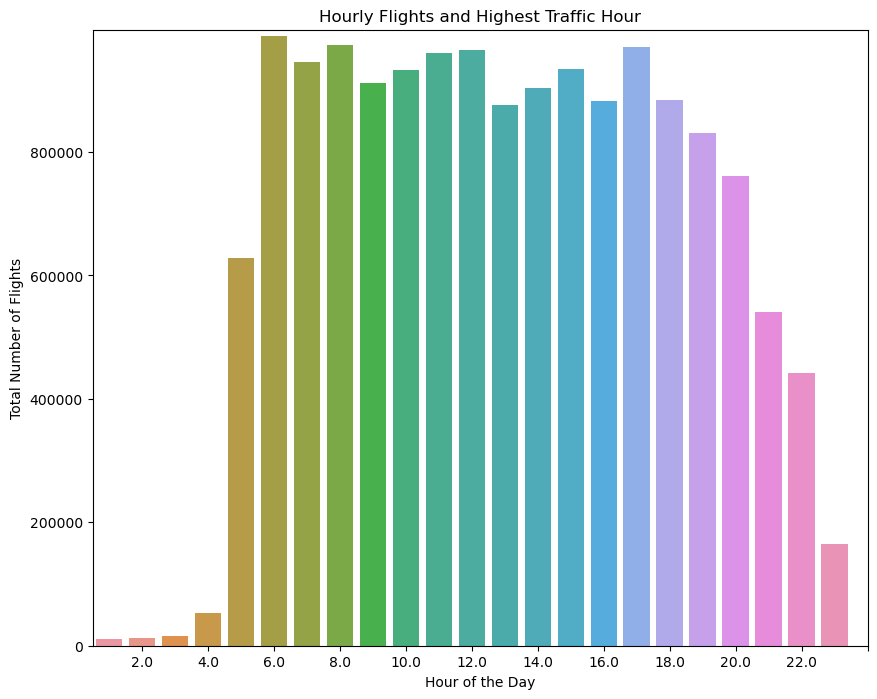

In [125]:
plt.figure(figsize=(10, 8))
sns.barplot(x=hourly_flights.index, y=hourly_flights.values)

plt.title('Hourly Flights and Highest Traffic Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Flights')
plt.xticks(hourly_flights.index[::2])
plt.ylim(bottom=0, top=hourly_flights.values.max()+10000)
plt.show()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [47]:
# Calculate the number of arrival delays caused by departure delays
dep_arr_delay = df_delay.loc[(df_delay['dep_delay'] > 0) & (df_delay['arr_delay'] > 0)]
num_dep_arr_delay = len(dep_arr_delay)

# Calculate the number of all arrival delays
num_arr_delay = len(df_delay.loc[df_delay['arr_delay'] > 0])

# Calculate the percentage of arrival delays caused by departure delays
percentage_dep_arr_delay = num_dep_arr_delay / num_arr_delay * 100

print("Percentage of arrival delays caused by departure delays: {:.2f}%".format(percentage_dep_arr_delay))

Percentage of arrival delays caused by departure delays: 71.29%


#### **Task 6**: How many states cover 50% of US air traffic? 

In [83]:
 df[['origin_city_name','flights']].head()

,origin_city_name,flights
0,"Appleton, WI",1
1,"Washington, DC",1
2,"White Plains, NY",1
3,"Sault Ste. Marie, MI",1
4,"Burbank, CA",1


In [82]:
# extract the state code from the origin airport

df['origin_state'] = df['origin_city_name'].str.split(',').str[1].str.strip()

In [87]:
# count the number of flights departing from each state
state_counts = df.groupby('origin_state')['flights'].count().reset_index(name='num_flights')

In [88]:
state_counts.head()

,origin_state,num_flights
0,AK,11132
1,AL,12002
2,AR,9072
3,AZ,56970
4,CA,240279


In [89]:
# calculate the percentage of flights from each state
state_counts['pct_flights'] = state_counts['num_flights'] / state_counts['num_flights'].sum() * 100

In [90]:
# sort the states in descending order by their percentage of air traffic
state_counts = state_counts.sort_values('pct_flights', ascending=False)


In [91]:
state_counts.head()

,origin_state,num_flights,pct_flights
4,CA,240279,10.998205
44,TX,215873,9.881078
8,FL,158715,7.264805
13,IL,137106,6.275704
9,GA,116547,5.334664


In [92]:
# calculate the cumulative sum of the percentage of flights
state_counts['cum_pct_flights'] = state_counts['pct_flights'].cumsum()

In [93]:

# find the number of states that cover 50% of air traffic
num_states = len(state_counts[state_counts['cum_pct_flights'] <= 50])

print(f"{num_states} states cover 50% of US air traffic.")

7 states cover 50% of US air traffic.


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [24]:
# Step 1: Calculate average speed of flights for each departure delay category
df['speed'] = df['distance'] / (df['air_time'] / 60)
df['is_delayed'] = (df['dep_delay'] > 0).astype(int)

avg_speed_delayed = df[df['is_delayed'] == 1]['speed'].mean()
avg_speed_not_delayed = df[df['is_delayed'] == 0]['speed'].mean()



In [25]:
# Step 2: Perform hypothesis test (two-sample t-test)
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df[df['is_delayed'] == 1]['speed'], df[df['is_delayed'] == 0]['speed'], equal_var=False)

print(f"Average speed of delayed flights: {avg_speed_delayed:.2f} miles per hour")
print(f"Average speed of not delayed flights: {avg_speed_not_delayed:.2f} miles per hour")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2f}")

Average speed of delayed flights: 405.34 miles per hour
Average speed of not delayed flights: 395.64 miles per hour
T-statistic: 243.98
P-value: 0.00


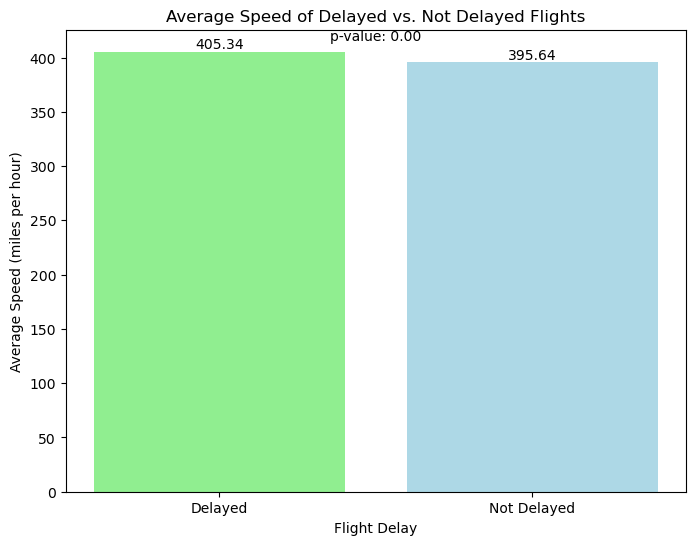

In [27]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Delayed', 'Not Delayed'], [avg_speed_delayed, avg_speed_not_delayed], color=['lightgreen', 'lightblue'])
plt.xlabel('Flight Delay')
plt.ylabel('Average Speed (miles per hour)')
plt.title('Average Speed of Delayed vs. Not Delayed Flights')
plt.ylim(bottom=0)

# Annotate the plot with the average speeds and p-value
plt.text(0, avg_speed_delayed, f'{avg_speed_delayed:.2f}', ha='center', va='bottom')
plt.text(1, avg_speed_not_delayed, f'{avg_speed_not_delayed:.2f}', ha='center', va='bottom')
plt.text(0.5, max(avg_speed_delayed, avg_speed_not_delayed) + 10, f'p-value: {p_value:.2f}', ha='center')

# Display the plot
plt.show()

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [126]:
# Create a new column for flight type based on distance
df['flight_type'] = pd.cut(df['distance'], bins=[0, 999, 1999, np.inf], labels=['SHORT', 'MEDIUM', 'LONG'])

# Group flights by the hour of departure and flight type, and count the number of flights in each group
hourly_flights_by_type = df.groupby([df['dep_time'].dt.hour, 'flight_type'])['flights'].count().unstack()



In [127]:
hourly_flights_by_type.head()

flight_type,SHORT,MEDIUM,LONG
dep_time,,,
1.0,4474,4307,1966
2.0,4193,6448,2380
3.0,3977,9395,1900
4.0,36849,14406,1417
5.0,506882,106807,14707


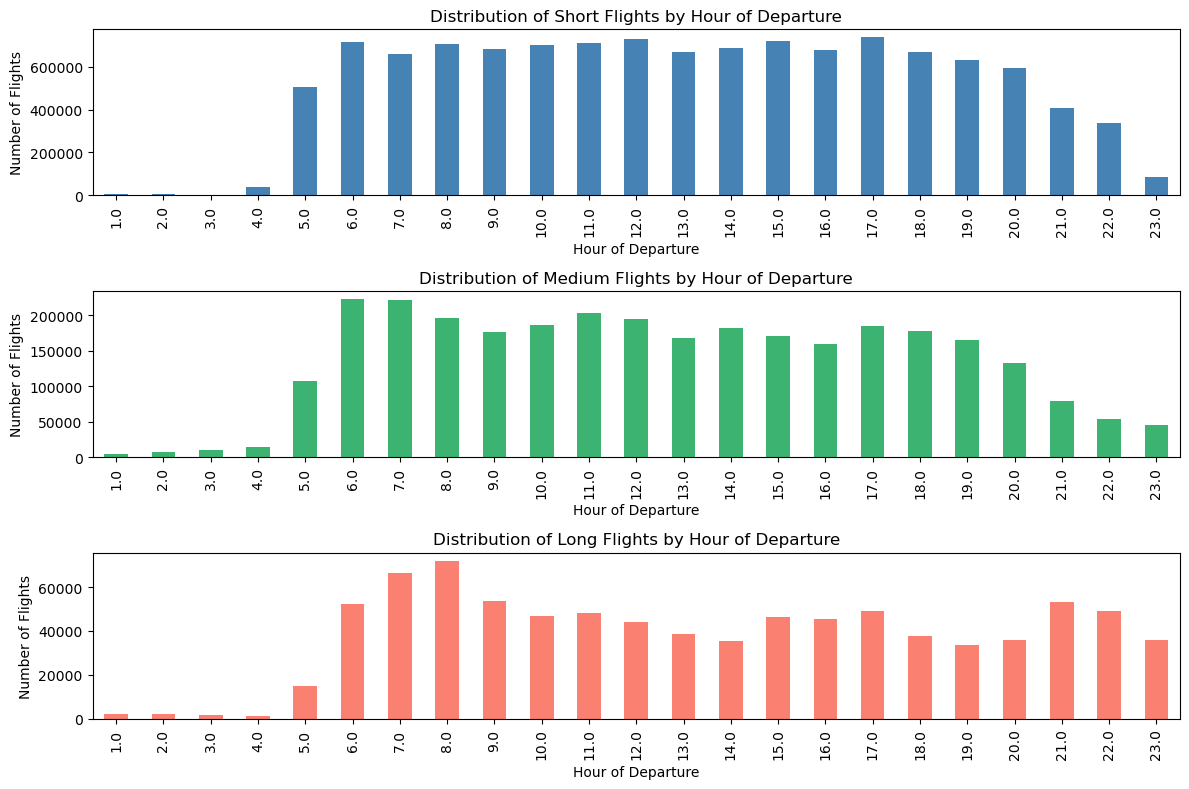

In [157]:
# Define a custom color palette for each flight type
colors = ['steelblue', 'mediumseagreen', 'salmon']

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the short flights
plt.subplot(311)
short_flights.plot(kind='bar', color=colors[0])
plt.title('Distribution of Short Flights by Hour of Departure')
plt.xlabel('Hour of Departure')
plt.ylabel('Number of Flights')

# Plot the medium flights
plt.subplot(312)
medium_flights.plot(kind='bar', color=colors[1])
plt.title('Distribution of Medium Flights by Hour of Departure')
plt.xlabel('Hour of Departure')
plt.ylabel('Number of Flights')

# Plot the long flights
plt.subplot(313)
long_flights.plot(kind='bar', color=colors[2])
plt.title('Distribution of Long Flights by Hour of Departure')
plt.xlabel('Hour of Departure')
plt.ylabel('Number of Flights')

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [124]:
# Find the top 10 busiest airports by number of flights
top_airports = df.groupby('origin')['flights'].count().sort_values(ascending=False).head(10)

In [159]:
top_airports.head()

origin_city_name
Chicago, IL              933420
Atlanta, GA              779033
New York, NY             580894
Dallas/Fort Worth, TX    570521
Denver, CO               542936
Name: flights, dtype: int64

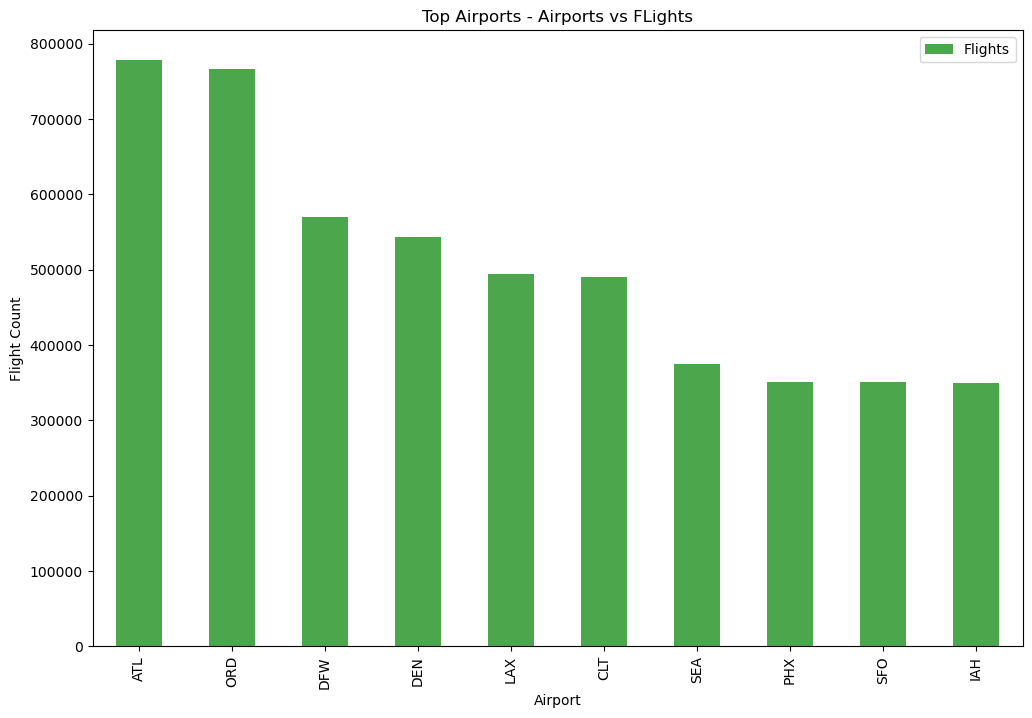

In [132]:

# Plot the bar chart for the top airports
plt.figure(figsize=(12, 8))
top_airports.plot(kind='bar', color='green', alpha=0.7, label='Flights')

# Set the labels and title
plt.xlabel('Airport')
plt.ylabel('Flight Count')
plt.title('Top Airports - Airports vs FLights')

# Set the legend
plt.legend()

# Show the plot
plt.show()


In [126]:
# Sort the data in descending order based on the total number of passengers
top_passengers = passengers.groupby('origin')['passengers'].count().sort_values(ascending=False).head(10)

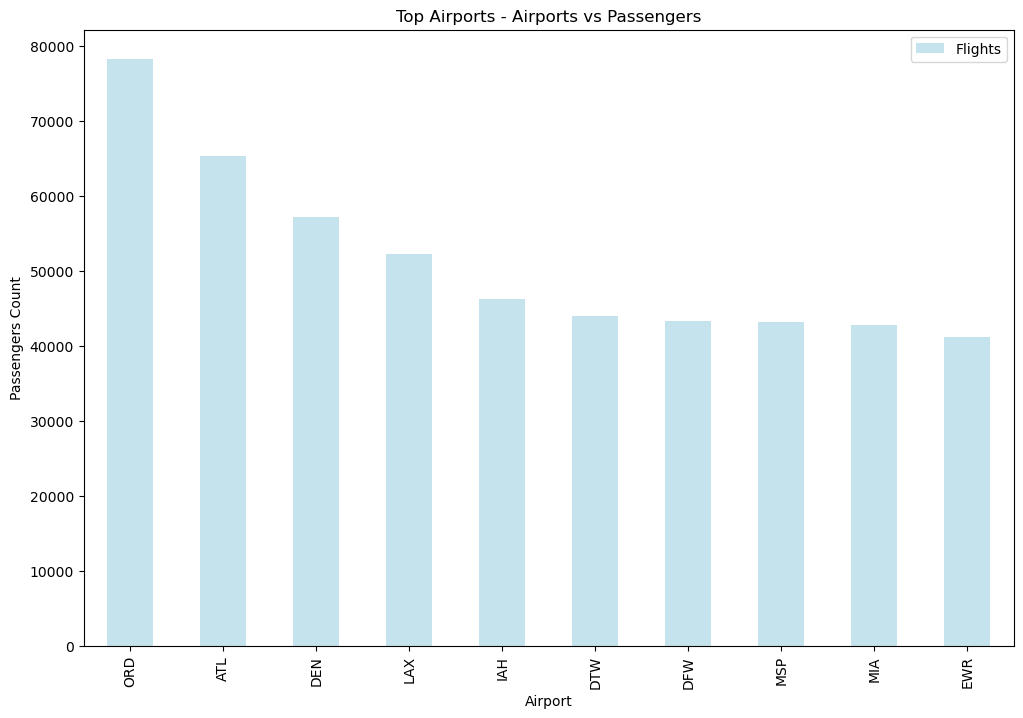

In [133]:

# Plot the bar chart for the top airports
plt.figure(figsize=(12, 8))
top_passengers.plot(kind='bar', color='lightblue', alpha=0.7, label='Flights')

# Set the labels and title
plt.xlabel('Airport')
plt.ylabel('Passengers Count')
plt.title('Top Airports - Airports vs Passengers')

# Set the legend
plt.legend()

# Show the plot
plt.show()


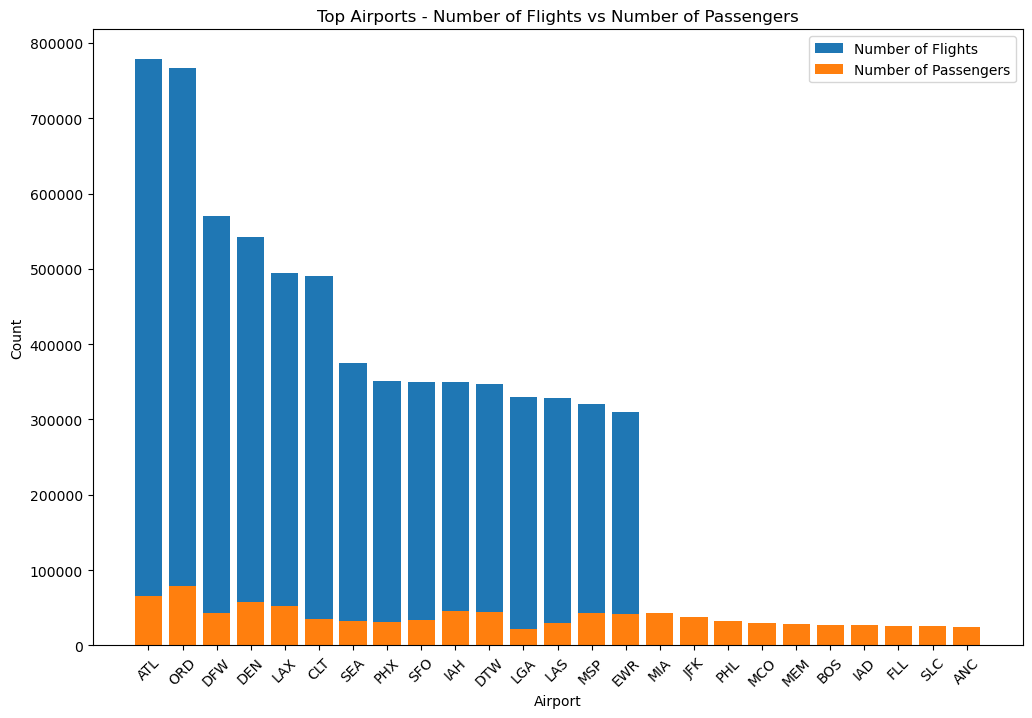

In [123]:

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot number of flights
ax.bar(top_airports.index, top_airports.values, label='Number of Flights')

# Plot number of passengers
ax.bar(top_passengers.index, top_passengers.values, label='Number of Passengers')

# Set x-axis label
ax.set_xlabel('Airport')

# Set y-axis label
ax.set_ylabel('Count')

# Set title
ax.set_title('Top Airports - Number of Flights vs Number of Passengers')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Combine the legends from both axes
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax.get_legend_handles_labels()
ax.legend(lines_1 + lines_2, labels_1 + labels_2)

# Add a legend
ax.legend()

# Display the plot
plt.show()

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

## Calculating the average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)

In [78]:
# Convert 'fl_date'  to date format
df['fl_date'] = pd.to_datetime(df['fl_date'])

# Group data by month / carrier and calculate sum 
#monthly_delays = df.groupby([df['fl_date'].dt.month, 'mkt_unique_carrier'])['arr_delay', 'dep_delay'].sum()
monthly_delays = df.groupby([df['fl_date'].dt.year, df['fl_date'].dt.month, 'mkt_unique_carrier'])['arr_delay', 'dep_delay'].sum()

monthly_delays['Total_delay'] = monthly_delays['arr_delay'] + monthly_delays['dep_delay']


C:\Users\nasir\AppData\Local\Temp\ipykernel_16260\235683711.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_delays = df.groupby([df['fl_date'].dt.year, df['fl_date'].dt.month, 'mkt_unique_carrier'])['arr_delay', 'dep_delay'].sum()


In [29]:
monthly_delays.head()

arr_delay  dep_delay  Total_delay
fl_date fl_date mkt_unique_carrier                                   
2018    1       AA                   685294.0  1411840.0    2097134.0
                AS                  -133439.0   -13223.0    -146662.0
                B6                   349114.0   474237.0     823351.0
                DL                   357125.0  1563763.0    1920888.0
                F9                    83151.0   151613.0     234764.0

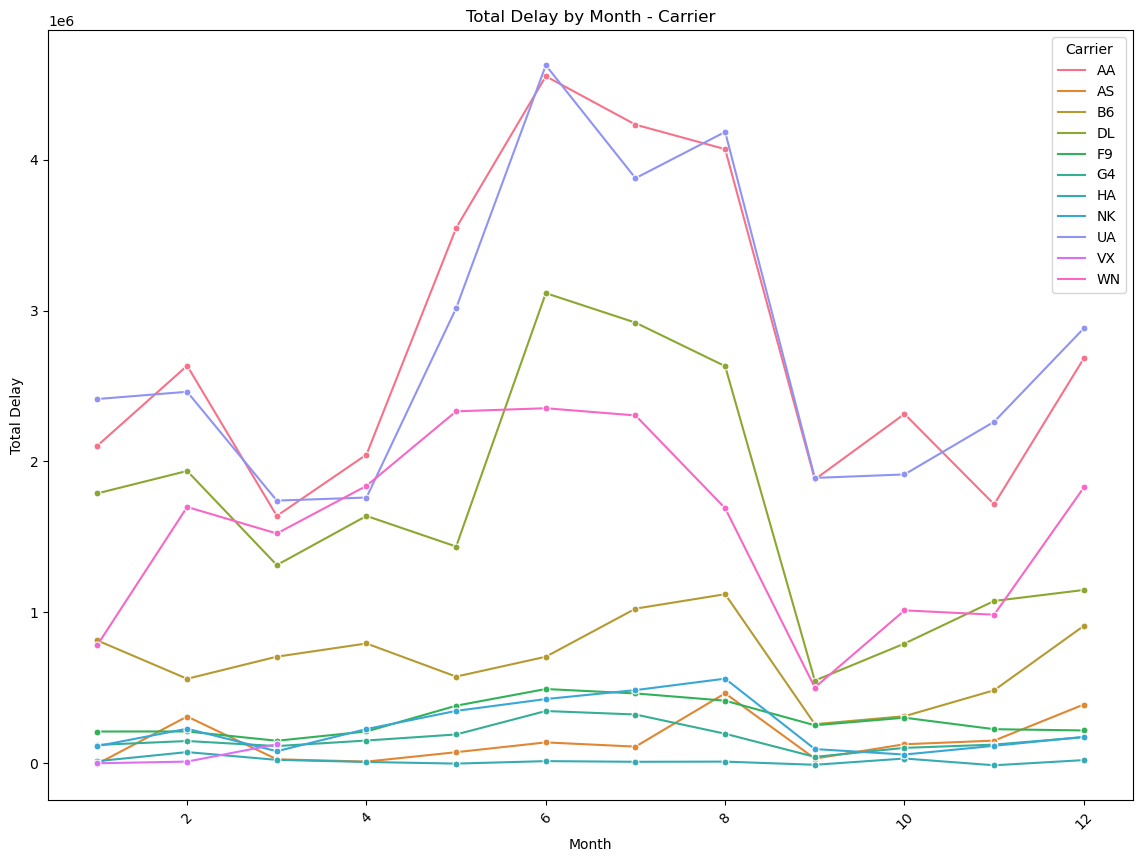

In [79]:


plt.figure(figsize=(14, 10))
sns.lineplot(data=monthly_delays, x='fl_date', y='Total_delay', hue='mkt_unique_carrier', marker='o', markersize=5,ci=None)
plt.xlabel('Month')
plt.ylabel('Total Delay')
plt.title('Total Delay by Month - Carrier')
plt.xticks(rotation=45)
plt.legend(title='Carrier')
plt.show()

In [45]:
# Number of flights per month and carrier
num_flights = df.groupby([df['fl_date'].dt.year, df['fl_date'].dt.month, 'mkt_unique_carrier'])['flights'].count()



In [138]:
num_flights.head()

fl_date  fl_date  mkt_unique_carrier
2018     1        AA                    157136
                  AS                     28295
                  B6                     23330
                  DL                    128361
                  F9                      9507
Name: flights, dtype: int64

In [46]:
# Divide sum of delays by number of flights to get average delay per month and carrier
average_monthly_delay = monthly_delays.div(num_flights, axis=0)


In [47]:
average_monthly_delay.head()

arr_delay  dep_delay  Total_delay
fl_date fl_date mkt_unique_carrier                                   
2018    1       AA                   4.361152   8.984828    13.345981
                AS                  -4.715992  -0.467326    -5.183319
                B6                  14.964166  20.327347    35.291513
                DL                   2.782192  12.182540    14.964732
                F9                   8.746292  15.947512    24.693805

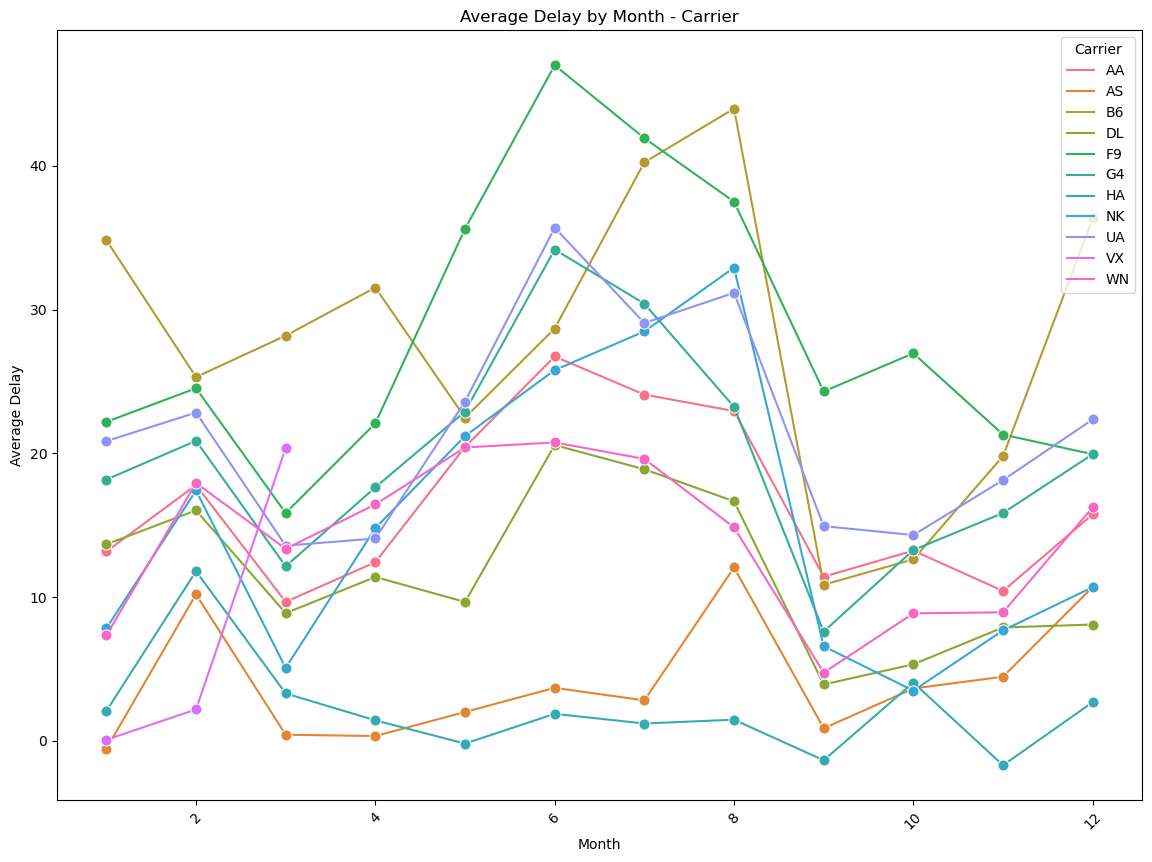

In [48]:
# Average Delay
plt.figure(figsize=(14, 10))
sns.lineplot(data=average_monthly_delay, x='fl_date', y='Total_delay', hue='mkt_unique_carrier', marker='o', markersize=8,ci=None)
plt.xlabel('Month')
plt.ylabel('Average Delay')
plt.title('Average Delay by Month - Carrier')
plt.xticks(rotation=45)
plt.legend(title='Carrier')
plt.show()

###  Calculating the distance covered monthly by different air carriers

In [162]:
monthly_distance = df.groupby([df['fl_date'].dt.year, df['fl_date'].dt.month, 'mkt_unique_carrier'])['distance'].sum()

In [163]:
monthly_distance.head()

fl_date  fl_date  mkt_unique_carrier
2018     1        AA                    110974727
                  AS                     24651526
                  B6                     24820411
                  DL                     88903498
                  F9                     10159554
Name: distance, dtype: int64

In [172]:
monthly_distance.head()

fl_date  fl_date  mkt_unique_carrier
2018     1        AA                    110974727
                  AS                     24651526
                  B6                     24820411
                  DL                     88903498
                  F9                     10159554
Name: distance, dtype: int64

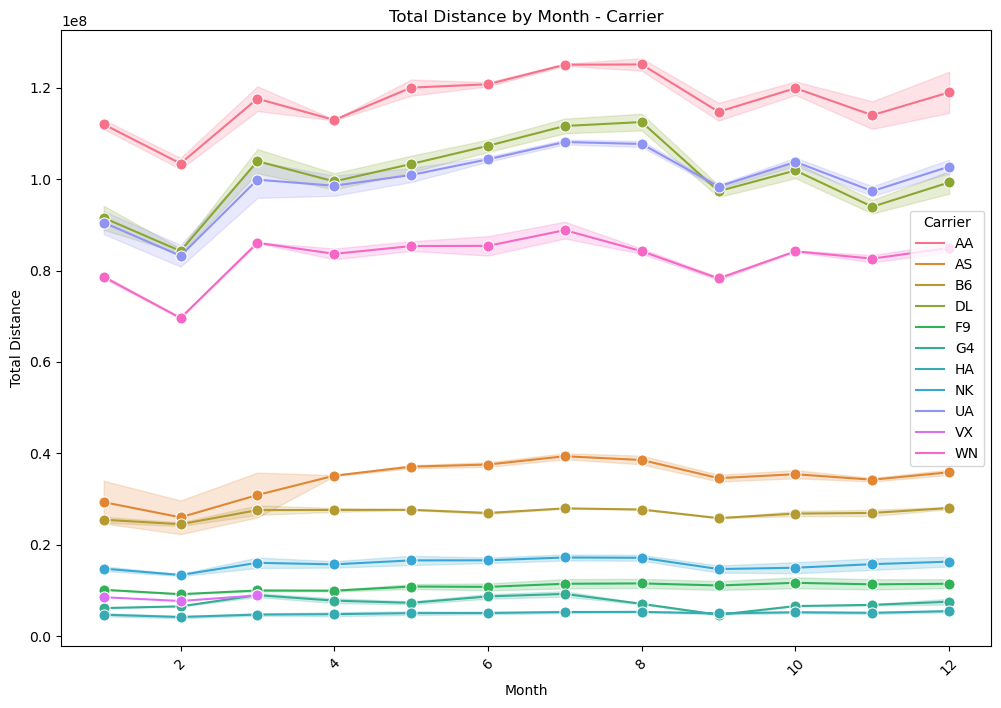

In [170]:

# Plotting line chart
plt.figure(figsize=(12, 8))
sns.lineplot(data=monthly_distance, x='fl_date', y=monthly_distance.values, hue='mkt_unique_carrier', marker='o', markersize=8)
plt.xlabel('Month')
plt.ylabel('Total Distance')
plt.title('Total Distance by Month - Carrier')
plt.xticks(rotation=45)
plt.legend(title='Carrier')
plt.show()

### Find out number of passengers that were carried by different air carriers monthly

In [75]:
# loading passengers csv into dataframe
passengers = pd.read_csv('data/passengers.csv')

In [76]:
passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,30,30,1122000,4500,3165,0,0,1404,6341,5443,...,US,United States,6,694,1,2015,4,3,F,IU
1,30,30,1122000,4500,3732,0,0,1250,5954,5176,...,US,United States,6,694,1,2015,4,3,F,IU
2,30,30,786000,3000,2182,0,0,952,4712,4056,...,US,United States,6,678,1,2015,4,2,F,IU
3,30,30,786000,3000,2359,0,0,333,2581,1763,...,US,United States,6,678,1,2015,4,1,F,IU
4,30,30,1122000,4500,4072,0,0,720,3605,3077,...,US,United States,6,694,1,2015,4,2,F,IU


In [54]:
passengers_carrier_monthly = passengers.groupby(['year', 'month', 'unique_carrier_name'])['passengers'].sum().reset_index()


In [59]:
passengers_carrier_monthly.sort_values('passengers', ascending=False)

,year,month,unique_carrier_name,passengers
15662,2019,7,Delta Air Lines Inc.,15662296
15940,2019,8,Delta Air Lines Inc.,15366370
12370,2018,7,Southwest Airlines Co.,15348967
8927,2017,7,Southwest Airlines Co.,15152308
15381,2019,6,Delta Air Lines Inc.,15125549
...,...,...,...,...
4018,2016,3,AirBridgeCargo Airlines Limited,0
6509,2016,11,Lan Colombia,0
14997,2019,5,ABSA-Aerolinhas Brasileiras,0
14998,2019,5,ABX Air Inc,0


## Total fuel comsumption per air carrier.

In [64]:
# loading passengers csv into dataframe
fuel = pd.read_csv('data/fuel_comsumption.csv')

In [69]:
fuel.dropna(inplace=True)

In [70]:
total_fuel_consumption = fuel.groupby('unique_carrier')['sdomt_gallons', 'satl_gallons', 'spac_gallons', 'slat_gallons'].sum()


C:\Users\nasir\AppData\Local\Temp\ipykernel_16260\1292281870.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_fuel_consumption = fuel.groupby('unique_carrier')['sdomt_gallons', 'satl_gallons', 'spac_gallons', 'slat_gallons'].sum()


In [73]:
 total_fuel_consumption.sort_values(by='sdomt_gallons', ascending=False).head(10)

,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons
unique_carrier,,,,
AA,1.001650e+10,2.766483e+09,1.186519e+09,2.614132e+09
WN,9.490980e+09,0.000000e+00,0.000000e+00,9.447010e+07
DL,9.419984e+09,3.643462e+09,1.954798e+09,1.429541e+09
UA,7.557889e+09,3.598202e+09,3.108240e+09,1.605472e+09
FX,3.342043e+09,7.292554e+08,1.166999e+09,1.079965e+08
B6,3.033772e+09,0.000000e+00,0.000000e+00,7.315855e+08
AS,2.624046e+09,0.000000e+00,0.000000e+00,4.972485e+07
5X,2.134807e+09,6.140420e+08,9.655250e+08,1.676080e+08
NK,1.510093e+09,0.000000e+00,0.000000e+00,1.532144e+08
